**Gözetimli Öğrenme**

1 Sınıflandırma
2 Regresyon( Tahmin )

Etiketli veriler ile çalışan öğrenme türüne denir.


Sınıflandırmada amaç bir karar sınıfı bulmaktır.
Regresyonda sonuçta önümüze iki farklı regresyon modeli çıkar.

Sınıflandırmada çıktılar kategoriktir.
Regresyonda çıktılar sayısal değerlerdir.

Kümelemeden farklı olarak sınıflandırmada sınıfların ne olduğu
önceden bellidir.

Çalıştığı parametreler ve değerlendirme metrikleri farklıdır.

Sınıflandırmada doğruluk, hassasiyet verileri algoritmayı test eder;

Regresyonda mutlak hatalar, ortalama kare hatası, Gradyan Mesafesi bulunur.



**=== Linear Regression ===**

Algoritmanın amacı bağımsız değişkenlere dayalı olarak bağımlı değişkenin değerini tahmin edebilecek en iyi doğrusal denklemi bulmaktır.

Güvenilir ve doğru bir çözüm elde etmek için bazı şartları sağlamak gerekir:

- Doğrusallık
- Bağımsızlık
- Normallik = hataların normal dağılıma sahip olması
- Çoklu bağlantı olmaması = Bağımsız değişkenler arasında yüksek korelasyon olmamalı.








**=== Logistic Regression ===**

Bu algoritmanın amacı bir veri kümesinin belirli bir gruba ait olma ihtimalini tahmin etmek.

Belirli bir bağımsız değişken kümesini kullanarak kategorik bağımlı değişkeni tahmin etmekte kullanılır.


Sonuçlar kategorik veya ayrık veriler olmalı.

S = 1 / 1+ e^-x

Gerçek sayı verilerini input alarak [0-1]  aralığında çıktılar elde etmeyi amaçlar.

Regresyon problemleri için Doğrusal Regresyon kullanılırken ; sınıflandırma problemlerini çözmek için
Lojistik regresyon kullanılır.

**Türleri :**

- Binom : iki olasılığa sahip olma durumu( 0 ve 1)
- Çok Terimli : Kedi, köpek, insan
- Sıralı LR = Düşük, orta, yüksek

(Toplam WiXi ) + b


## Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

In [2]:
data = pd.read_csv("/data.csv")

data = data.dropna()

train_input = np.array(data.x[0:500]).reshape(500,1)
train_output = np.array(data.y[0:500]).reshape(500,1)

test_input = np.array(data.x[500:700]).reshape(199,1)
test_output = np.array(data.y[500:700]).reshape(199,1)

In [3]:
class LinearRegression:
    def __init__(self):
        self.parameters = {}
    def forward_propagation(self,train_input):
        m = self.parameters['m']
        c = self.parameters['c']
        predictions = np.multiply(m,train_input)+c
        return predictions
    def cost_function(self,predictions,train_output):
        cost = np.mean((train_output - predictions)**2)
        return cost
    def backward_propagation(self,train_input,train_output,predictions):
        derivates = {}
        df = (train_output - predictions)* -1
        dm = np.mean(np.multiply(train_input, df))
        dc = np.mean(df)
        derivates['dm'] = dm
        derivates['dc'] = dc
        return derivates
    def update_parameters(self,derivates, learning_rate):
        self.parameters['m'] = self.parameters['m'] - learning_rate * derivates['dm']
        self.parameters['c'] = self.parameters['c'] - learning_rate * derivates['dc']

    def train(self,train_input,train_output,learning_rate,iters):
        self.parameters['m']=np.random.uniform(0,1)* -1
        self.parameters['c']=np.random.uniform(0,1)* -1
        self.loss=[]

        for i in range(iters):
            predictions = self.forward_propagation(train_input)
            cost = self.cost_function(predictions, train_output)

            self.loss.append(cost)
            print('İterasyon = {}, Loss = {}'.format(i+1, cost))

            derivates = self.backward_propagation(train_input,train_output,predictions)
            self.update_parameters(derivates, learning_rate)
        return self.parameters, self.loss

In [4]:
linear_regression_modeli = LinearRegression()
parameters, loss = linear_regression_modeli.train(train_input,train_output, 0.0001, 20)

İterasyon = 1, Loss = 3896.000756952746
İterasyon = 2, Loss = 1771.923993420166
İterasyon = 3, Loss = 808.2280114944605
İterasyon = 4, Loss = 370.9980754694523
İterasyon = 5, Loss = 172.6263676051609
İterasyon = 6, Loss = 82.62490242668521
İterasyon = 7, Loss = 41.79113639019155
İterasyon = 8, Loss = 23.26480991466559
İterasyon = 9, Loss = 14.859393476670418
İterasyon = 10, Loss = 11.045845133120444
İterasyon = 11, Loss = 9.315632430242964
İterasyon = 12, Loss = 8.530631415207369
İterasyon = 13, Loss = 8.174473989981418
İterasyon = 14, Loss = 8.01288337653731
İterasyon = 15, Loss = 7.939567941189181
İterasyon = 16, Loss = 7.906303052000778
İterasyon = 17, Loss = 7.891209140047017
İterasyon = 18, Loss = 7.884359420671879
İterasyon = 19, Loss = 7.881250100681604
İterasyon = 20, Loss = 7.879837804115594


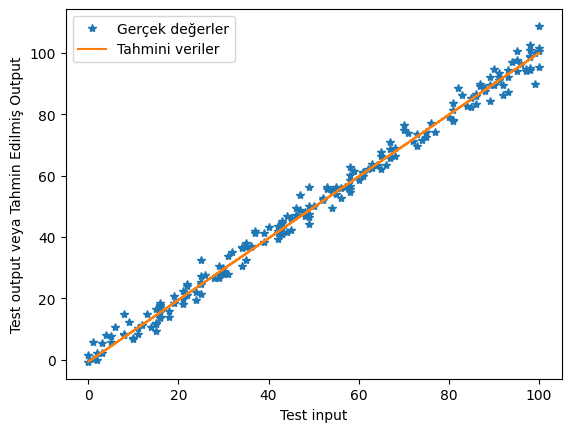

In [5]:
y_pred = test_input * parameters['m'] + parameters['c']

plt.plot(test_input, test_output, '*', label='Gerçek değerler')
plt.plot(test_input, y_pred, label= 'Tahmini veriler')
plt.xlabel('Test input')
plt.ylabel('Test output veya Tahmin Edilmiş Output')
plt.legend()
plt.show()

## Logistic Regression

In [6]:
dataset= pd.read_csv('/User_Data.csv')

In [7]:
x = dataset.iloc[:, [2,3]].values #input
y = dataset.iloc[:, 4].values #output

In [8]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain,ytest = train_test_split(x,y, test_size=0.25, random_state=0)

In [9]:
from sklearn.preprocessing import StandardScaler

sc= StandardScaler()
xtrain= sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

print(xtrain[0:10, :])

[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]
 [ 1.47293972  0.99784738]
 [ 0.08648817 -0.79972756]
 [-0.01254409 -0.24885782]
 [-0.21060859 -0.5677824 ]
 [-0.21060859 -0.19087153]]


In [10]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=0)
classifier.fit(xtrain, ytrain)

LogisticRegression(random_state=0)

In [11]:
y_pred = classifier.predict(xtest)

In [12]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred)
print('Karışıklık Matrisi : \n', cm)

Karışıklık Matrisi : 
 [[65  3]
 [ 8 24]]


In [13]:
from sklearn.metrics import accuracy_score

print('Accuracy : ', accuracy_score(ytest, y_pred))

Accuracy :  0.89


<ipython-input-14-b588d7b81d44>:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j,0], X_set[y_set == j,1], c = ListedColormap(('green','red'))(i),label= j)


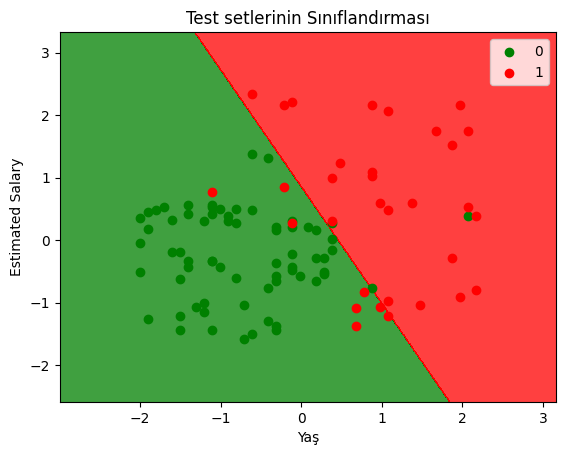

In [14]:
from matplotlib.colors import ListedColormap
X_set , y_set = xtest, ytest

X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min() -1 ,
                              stop = X_set[:,0].max()+1, step=0.01),
                    np.arange(start=X_set[:,1].min() -1 ,
                              stop = X_set[:,1].max()+1, step=0.01))

plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha=0.75, cmap= ListedColormap(('green','red')))

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(), X2.max())


for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0], X_set[y_set == j,1], c = ListedColormap(('green','red'))(i),label= j)

plt.title('Test setlerinin Sınıflandırması')
plt.xlabel('Yaş')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()